In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib
import matplotlib.image as mpimg
import seaborn
import matplotlib.pyplot as plt
from operator import truediv
from math import log
import math
import time
import itertools
from collections import Counter
from Bio.Seq import Seq
import random
seaborn.set_style("white")


%matplotlib inline

## Looking for correlational trends in promoter structure 

In [2]:
ARF5_annotated = pd.read_csv('/Users/arjun/Downloads/170706_ARF5_merged_datasets_annotated_promoters.csv')
sequences = ARF5_annotated

In [23]:
def Label_sequence_with_auxre_metrics(sequences):
    
    number_of_auxre = [0]*len(sequences)
    distance_between_auxre = [0]*len(sequences)
    seq_between_auxre = [' ']*len(sequences)
    orientation = [' ']*len(sequences)
    gc_percent = [0]*len(sequences)
    gc_percent_seq_between_auxre = [0]*len(sequences)
    counter=0
    for seq in sequences['sequence']:
        number_of_auxre[counter] = seq[0:27].count('TGTC') + seq[0:27].count('GACA')
        gc_percent[counter] = float(seq.count('G')+seq.count('C'))/len(seq)*100
        
        if number_of_auxre[counter] == 1:
            distance_between_auxre[counter] = 0
            seq_between_auxre[counter] = 'None'
            gc_percent_seq_between_auxre[counter] = 0
            orientation[counter] = 'None'
        
        elif number_of_auxre[counter] == 2:
            if seq[22:26] == 'GACA':
                pos_tgtc = seq.find('TGTC',0,22)
                pos_gaca = seq.find('GACA',0,22)
                if pos_tgtc > (-1):
                    distance_between_auxre[counter] = 22-pos_tgtc-4-4
                    seq_between_auxre[counter] = seq[(pos_tgtc+6):20]
                    orientation[counter] = 'tail-tail'
                elif pos_gaca > (-1):
                    distance_between_auxre[counter] = 22-pos_gaca-4-2
                    seq_between_auxre[counter] = seq[(pos_gaca+4):20]
                    orientation[counter] = 'head-tail'
                    
            elif seq[21:25] == 'TGTC':
                pos_tgtc = seq.find('TGTC',0,21)
                pos_gaca = seq.find('GACA',0,21)
                if pos_tgtc > (-1):
                    distance_between_auxre[counter] = 21-pos_tgtc-4
                    seq_between_auxre[counter] =seq[(pos_tgtc+4):21]
                    if distance_between_auxre[counter] >0:
                        gc_percent_seq_between_auxre[counter] = float(seq_between_auxre[counter].count('G')+seq_between_auxre[counter].count('C'))/len(seq_between_auxre[counter])*100
                    else:
                        gc_percent_seq_between_auxre[counter] = 0
                    orientation[counter] = 'tail-head'
                elif pos_gaca > (-1):
                    distance_between_auxre[counter] = 21-pos_gaca-4
                    seq_between_auxre[counter] = seq[(pos_gaca+4):21]
                    if distance_between_auxre[counter] >0:
                        gc_percent_seq_between_auxre[counter] = float(seq_between_auxre[counter].count('G')+seq_between_auxre[counter].count('C'))/len(seq_between_auxre[counter])*100
                    else:
                        gc_percent_seq_between_auxre[counter] = 0
                    orientation[counter] = 'head-head'
            
            else:
                pos_tgtc_first_half = seq.find('TGTC',0,18)
                pos_gaca_first_half = seq.find('GACA',0,18)
                pos_tgtc_second_half = seq.find('TGTC',12,30)
                pos_gaca_second_half = seq.find('GACA',12,30)
                
                if ((pos_tgtc_first_half > (-1))&(pos_tgtc_second_half > (-1))):
                    distance_between_auxre[counter] = pos_tgtc_second_half-pos_tgtc_first_half-4
                    seq_between_auxre[counter] = seq[(pos_tgtc_first_half+4): pos_tgtc_second_half]
#                     gc_percent_seq_between_auxre[counter] = float(seq_between_auxre[counter].count('G')+seq_between_auxre[counter].count('C'))/len(seq_between_auxre[counter])*100
                    orientation[counter] = 'tail-head'
                    
                elif ((pos_gaca_first_half > (-1))&(pos_tgtc_second_half > (-1))):
                    distance_between_auxre[counter] = pos_tgtc_second_half-pos_gaca_first_half-4
                    seq_between_auxre[counter] = seq[(pos_gaca_first_half+4): pos_tgtc_second_half]
#                     gc_percent_seq_between_auxre[counter] = float(seq_between_auxre[counter].count('G')+seq_between_auxre[counter].count('C'))/len(seq_between_auxre[counter])*100
                    orientation[counter] = 'head-head'
                
                elif ((pos_tgtc_first_half > (-1))&(pos_gaca_second_half > (-1))):
                    distance_between_auxre[counter] = pos_gaca_second_half-pos_tgtc_first_half-4-4
                    seq_between_auxre[counter] = seq[(pos_tgtc_first_half+4): pos_gaca_second_half]
#                     gc_percent_seq_between_auxre[counter] = float(seq_between_auxre[counter].count('G')+seq_between_auxre[counter].count('C'))/len(seq_between_auxre[counter])*100
                    orientation[counter] = 'tail-tail'
                    
                elif ((pos_gaca_first_half > (-1))&(pos_gaca_second_half > (-1))):
                    distance_between_auxre[counter] = pos_gaca_second_half-pos_gaca_first_half-4-2
                    seq_between_auxre[counter] = seq[(pos_gaca_first_half+4): pos_gaca_second_half]
#                     gc_percent_seq_between_auxre[counter] = float(seq_between_auxre[counter].count('G')+seq_between_auxre[counter].count('C'))/len(seq_between_auxre[counter])*100
                    orientation[counter] = 'head-tail'
        
        if number_of_auxre[counter]>2:
            distance_between_auxre[counter] = 0
            seq_between_auxre[counter] = 'None'
            gc_percent_seq_between_auxre[counter] = 0
            orientation[counter] = 'None'
            
        counter = counter+1
        
    sequences['distance between auxre'] = distance_between_auxre
    sequences['seq between auxre'] = seq_between_auxre
    sequences['orientation'] = orientation
    sequences['number of auxre'] = number_of_auxre
    sequences['gc percent seq'] = gc_percent
    sequences['gc percent seq between auxre'] = gc_percent_seq_between_auxre
    sequences['log enrichment'] = [math.log(x) for x in sequences['enrichment']]
    
    return sequences

data = Label_sequence_with_auxre_metrics(sequences)



C:\Users\arjun\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


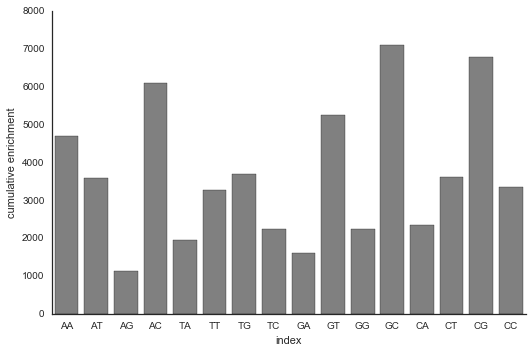

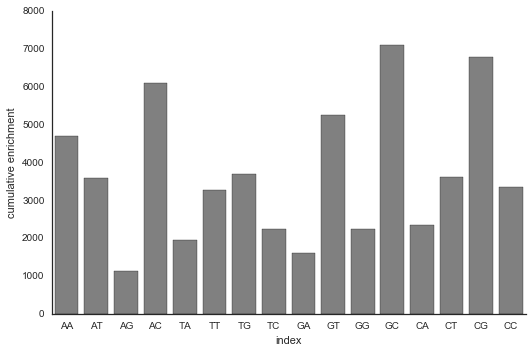

In [24]:
#Make a list of all single auxre's and find the adjacent sequences
ARF5_annotated=data
Single_auxre = ARF5_annotated[ARF5_annotated['number of auxre']==1]
adjacent_bp = []

for seq in Single_auxre['sequence']:

    pos_tgtc = seq.find('TGTC',0,27)
    pos_gaca = seq.find('GACA',0,27)

    if pos_tgtc>(-1):
        adjacent_bp.append(seq[(pos_tgtc+5):(pos_tgtc+7)])
    if pos_gaca>(-1):
        adjacent_bp.append(str(Seq(seq[(pos_gaca-2):(pos_gaca)]).reverse_complement())) #reverse complementing the basepairs next to gaca

Single_auxre['adjacent_bp'] = adjacent_bp
    
#make a library of all 2 mers    
two_mer_library_seq = map(''.join, itertools.product('ATGC', repeat=2))
two_mer_library = pd.DataFrame(index=two_mer_library_seq,data={ 'cumulative enrichment':[0]*len(two_mer_library_seq)})
# two_mer_cumulative enrichment=[0]*len(two_mer_library_seq)

#removing seq where GACA is near beginning
Single_auxre = Single_auxre[Single_auxre['adjacent_bp']!='']
    
counter1=0
for seq in Single_auxre['adjacent_bp']:
    two_mer_library.loc[seq] += Single_auxre.iloc[counter1]['enrichment']
    counter1 = counter1+ 1

        
two_mer_library.reset_index(level=0, inplace=True)

fig = seaborn.FacetGrid(data=two_mer_library,aspect = 1.5,size=5)
fig = fig.map(seaborn.barplot,'index','cumulative enrichment',color='Grey')
fig.savefig('/Users/arjun/Downloads/MCLE_fig3c.svg')


# Doing analysis for just 1 auxre

for seq in Single_auxre['sequence']:
    terminal_auxre = seq[22:26]
Single_auxre['terminal auxre'] = terminal_auxre

Single_auxre_GACA = Single_auxre[Single_auxre['terminal auxre']=='GACA']

two_mer_library_GACA = pd.DataFrame(index=two_mer_library_seq,data={ 'cumulative enrichment':[0]*len(two_mer_library_seq)})

counter1=0
for seq in Single_auxre_GACA['adjacent_bp']:
    two_mer_library_GACA.loc[seq] += Single_auxre_GACA.iloc[counter1]['enrichment']
    counter1 = counter1+ 1

two_mer_library_GACA.reset_index(level=0, inplace=True)

fig = seaborn.FacetGrid(data=two_mer_library_GACA,aspect = 1.5,size=5)
fig = fig.map(seaborn.barplot,'index','cumulative enrichment',color='Grey')
fig.savefig('/Users/arjun/Downloads/MCLE_fig3c_with_just_GACA.svg')



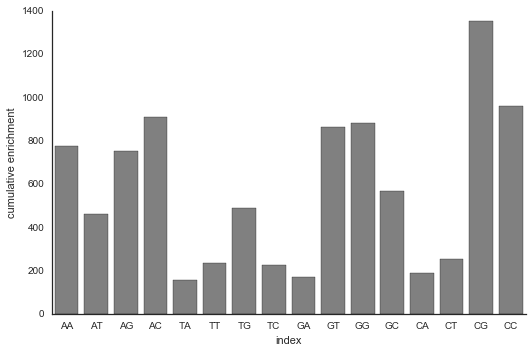

In [20]:
Double_auxre = ARF5_annotated[ARF5_annotated['number of auxre']==2]
adjacent_bp = []
enrichment=[]
for (seq,enrich) in zip(Double_auxre['sequence'],Double_auxre['enrichment']):
    
    import re
    pos_tgtc = [m.start() for m in re.finditer('TGTC', seq)]
    
    if pos_tgtc>(-1):
        for counter in range(len(pos_tgtc)):
            if pos_tgtc<21:
                adjacent_bp.append(seq[(pos_tgtc[counter]+5):(pos_tgtc[counter]+7)])
                enrichment.append(enrich)
    
    pos_gaca = [m.start() for m in re.finditer('GACA', seq)]
    if pos_gaca>(-1):
        for counter in range(len(pos_gaca)):
            adjacent_bp.append(str(Seq(seq[(pos_gaca[counter]-2):(pos_gaca[counter])]).reverse_complement())) #reverse complementing the basepairs next to gaca
            enrichment.append(enrich)

#make a library of all 2 mers    
two_mer_library_seq = map(''.join, itertools.product('ATGC', repeat=2))
two_mer_library_seq = two_mer_library_seq+['']
two_mer_library = pd.DataFrame(index=two_mer_library_seq,data={ 'cumulative enrichment':[0]*len(two_mer_library_seq)})

data = pd.DataFrame({'seq':adjacent_bp,'enrichment':enrichment})


counter1=0
for seq in adjacent_bp:
    two_mer_library.loc[seq] =two_mer_library.loc[seq] + enrichment[counter1]
    counter1 = counter1+ 1

    
two_mer_library.reset_index(level=0, inplace=True)
two_mer_library = two_mer_library[two_mer_library['index']!='']
fig = seaborn.FacetGrid(data=two_mer_library,aspect = 1.5,size=5)
fig = fig.map(seaborn.barplot,'index','cumulative enrichment',color='Grey')
fig.savefig('/Users/arjun/Downloads/MCLE_fig3c_2AuxREs.svg')

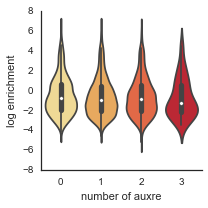

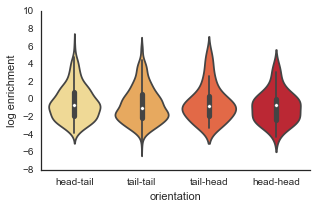

In [24]:
#plotting the correlations - Without removing anything below 4 for selection
fig = seaborn.FacetGrid(data=data[data['number of auxre']<4])
fig = fig.map(seaborn.violinplot,'number of auxre','log enrichment',palette='YlOrRd')
fig.savefig('/Users/arjun/Downloads/MCLE_fig3a.svg')

fig = seaborn.FacetGrid(data=data[(data['number of auxre']==2)&(data['orientation']!=' ')&(data['distance between auxre']>0)],aspect=1.5)
fig = fig.map(seaborn.violinplot,'orientation','log enrichment',palette='YlOrRd')
fig.savefig('/Users/arjun/Downloads/MCLE_fig3b.svg')


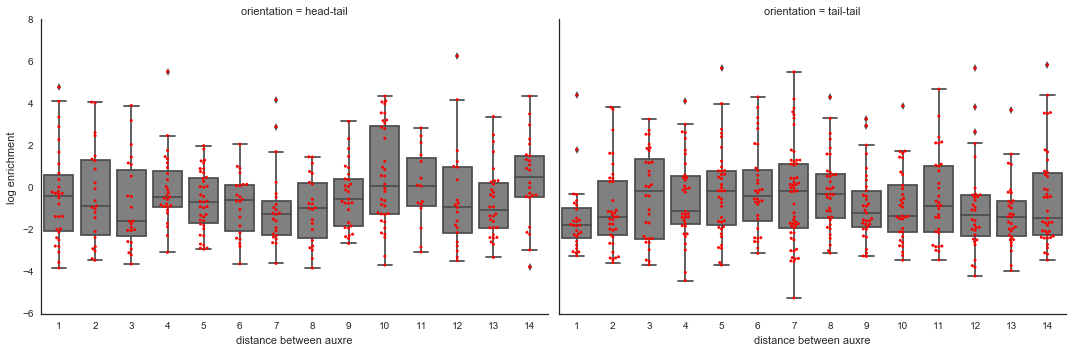

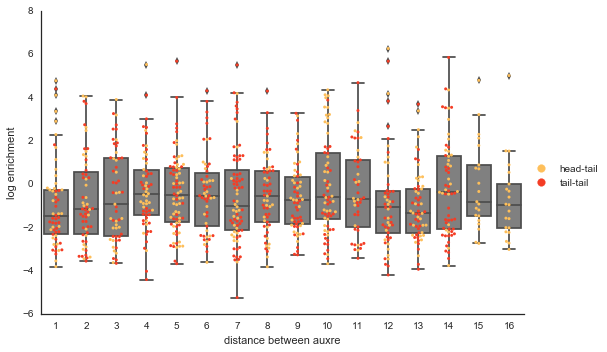

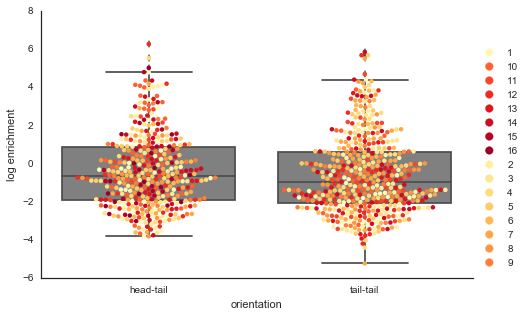

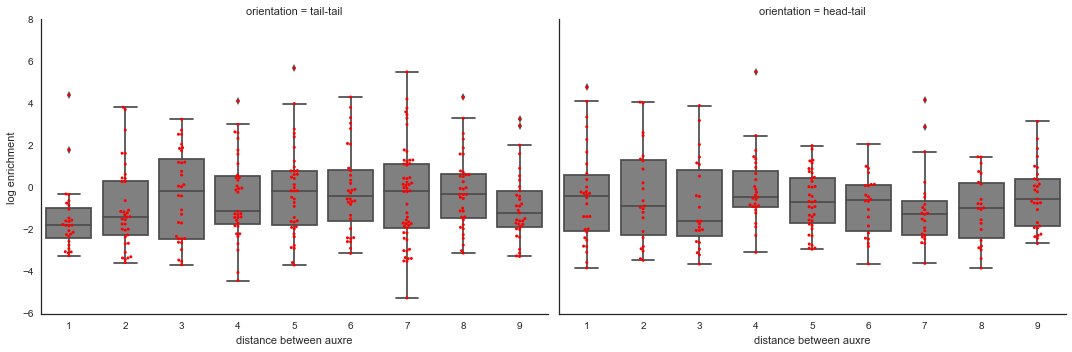

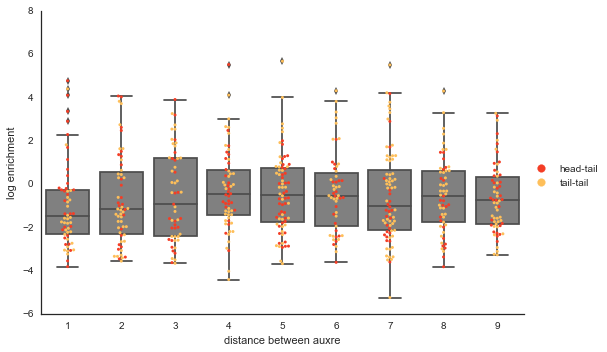

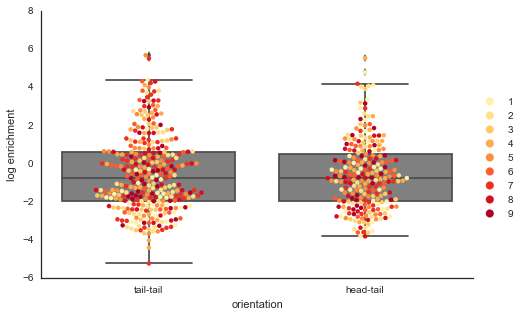

In [96]:
#plotting the correlations - Without removing anything below 4 for selection

fig = seaborn.FacetGrid(data=data[(data['number of auxre']==2)&((data['orientation']=='tail-tail')|(data['orientation']=='head-tail'))&(data['distance between auxre']>0)],aspect=1.5,size=5,col='orientation')
fig = fig.map(seaborn.boxplot,'distance between auxre','log enrichment',color='Grey')
fig = fig.map(seaborn.swarmplot,'distance between auxre','log enrichment',color='Red',size=3)
fig.savefig('/Users/arjun/Downloads/MCLE_fig3d.1.svg')


fig = seaborn.FacetGrid(data=data[(data['number of auxre']==2)&((data['orientation']=='tail-tail')|(data['orientation']=='head-tail'))&(data['distance between auxre']>0)],aspect=1.5,size=5)
fig = fig.map(seaborn.boxplot,'distance between auxre','log enrichment',color='Grey')
fig = fig.map(seaborn.swarmplot,'distance between auxre','log enrichment','orientation',palette='YlOrRd',size=3).add_legend()
fig.savefig('/Users/arjun/Downloads/MCLE_fig3d.2.svg')


fig = seaborn.FacetGrid(data=data[(data['number of auxre']==2)&((data['orientation']=='tail-tail')|(data['orientation']=='head-tail'))&(data['distance between auxre']>0)],aspect=1.5,size=4.5)
fig = fig.map(seaborn.boxplot,'orientation','log enrichment',color='Grey')
fig = fig.map(seaborn.swarmplot,'orientation','log enrichment','distance between auxre',palette='YlOrRd',size=4.5).add_legend()
fig.savefig('/Users/arjun/Downloads/MCLE_fig3d.3.svg')

ARF5_annotated=data

fig = seaborn.FacetGrid(data=ARF5_annotated[(ARF5_annotated['number of auxre']==2)&((ARF5_annotated['orientation']=='tail-tail')|(ARF5_annotated['orientation']=='head-tail'))&(ARF5_annotated['distance between auxre']>0)&(ARF5_annotated['distance between auxre']<10)],aspect=1.5,size=5,col='orientation')
fig = fig.map(seaborn.boxplot,'distance between auxre','log enrichment',color='Grey')
fig = fig.map(seaborn.swarmplot,'distance between auxre','log enrichment',color='Red',size=3)
fig.savefig('/Users/arjun/Downloads/MCLE_fig3d.4.svg')


fig = seaborn.FacetGrid(data=ARF5_annotated[(ARF5_annotated['number of auxre']==2)&((ARF5_annotated['orientation']=='tail-tail')|(ARF5_annotated['orientation']=='head-tail'))&(ARF5_annotated['distance between auxre']>0)&(ARF5_annotated['distance between auxre']<10)],aspect=1.5,size=5)
fig = fig.map(seaborn.boxplot,'distance between auxre','log enrichment',color='Grey')
fig = fig.map(seaborn.swarmplot,'distance between auxre','log enrichment','orientation',palette='YlOrRd',size=3).add_legend()
fig.savefig('/Users/arjun/Downloads/MCLE_fig3d.5.svg')


fig = seaborn.FacetGrid(data=ARF5_annotated[(ARF5_annotated['number of auxre']==2)&((ARF5_annotated['orientation']=='tail-tail')|(ARF5_annotated['orientation']=='head-tail'))&(ARF5_annotated['distance between auxre']>0)&(ARF5_annotated['distance between auxre']<10)],aspect=1.5,size=4.5)
fig = fig.map(seaborn.boxplot,'orientation','log enrichment',color='Grey')
fig = fig.map(seaborn.swarmplot,'orientation','log enrichment','distance between auxre',palette='YlOrRd',size=4.5).add_legend()
fig.savefig('/Users/arjun/Downloads/MCLE_fig3d.6.svg')




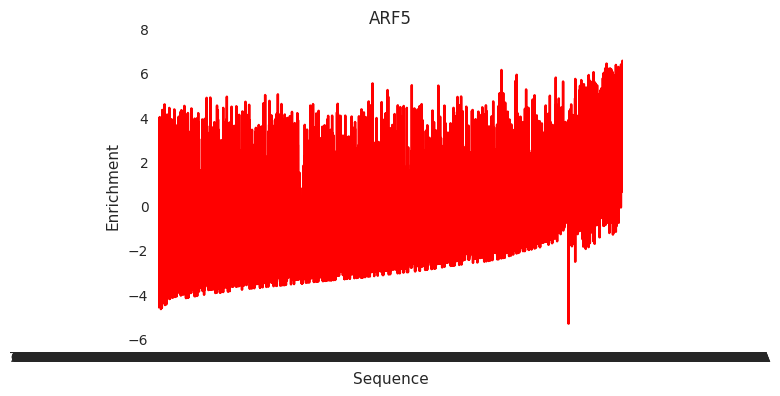

In [28]:
#Calculating and plotting enrichment
import pylab

names = ARF5['sequence']
enrichment = [log(x) for x in ARF5['enrichment']]

pylab.figure(2)
x = range(len(names))
pylab.xticks(x, names)
pylab.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off')         # ticks along the top edge are off
pylab.plot(x,enrichment,"r")
pylab.xlabel('Sequence')
pylab.ylabel('Enrichment')
pylab.title('ARF5')
pylab.show()
